# **Exploring Factors Influencing Depression**

### **Objective**:
Depression is a common and serious medical illness. In this analysis, I conduct tests and explore factors influencing depression, such as age, marital status, smoking habits, income, sleep patterns, and more. This analysis aims to uncover underlying causal relationships and provide insights into the causes of depression and prevention strategies.

## **Exploratory Data Analysis (EDA)**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from scipy.stats import spearmanr

In [7]:
df = pd.read_csv("depression_data.csv")
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

In [11]:
# Convert categorical variable to numeric
df["History of Mental Illness"].replace(["No", "Yes"], [0, 1], inplace = True)
df["History of Substance Abuse"].replace(["No", "Yes"], [0, 1], inplace = True)
df["Family History of Depression"].replace(["No", "Yes"], [0, 1], inplace = True)
df["Chronic Medical Conditions"].replace(["No", "Yes"], [0, 1], inplace = True)
df["Employment Status"].replace(["Unemployed", "Employed"], [0, 1], inplace = True)

## Marital Status and Age

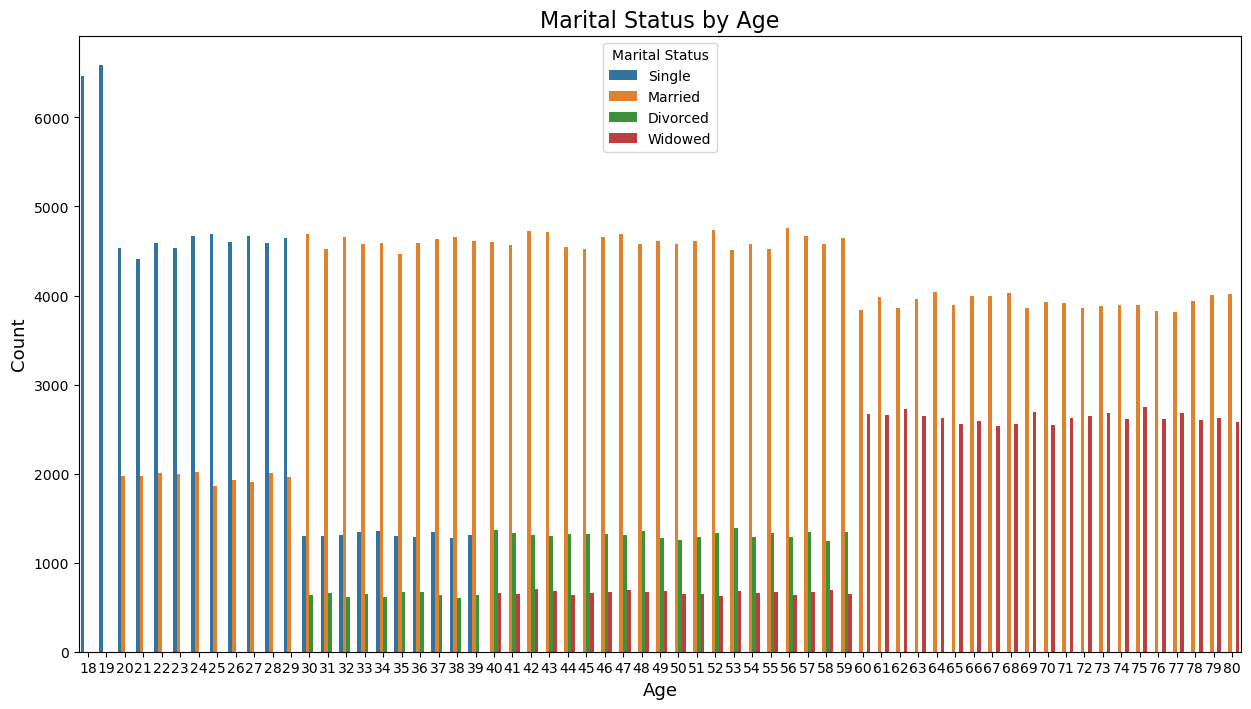

In [13]:
marital_status_age = df.groupby(["Age", "Marital Status"])[["Age"]].count().rename(columns={'Age': 'count'}).reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(data = marital_status_age, x="Age", y="count", hue="Marital Status")
plt.title("Marital Status by Age", fontsize= 16)
plt.xlabel("Age", fontsize= 13)
plt.ylabel("Count", fontsize= 13)
plt.show()

## Physical Activity Level and Age

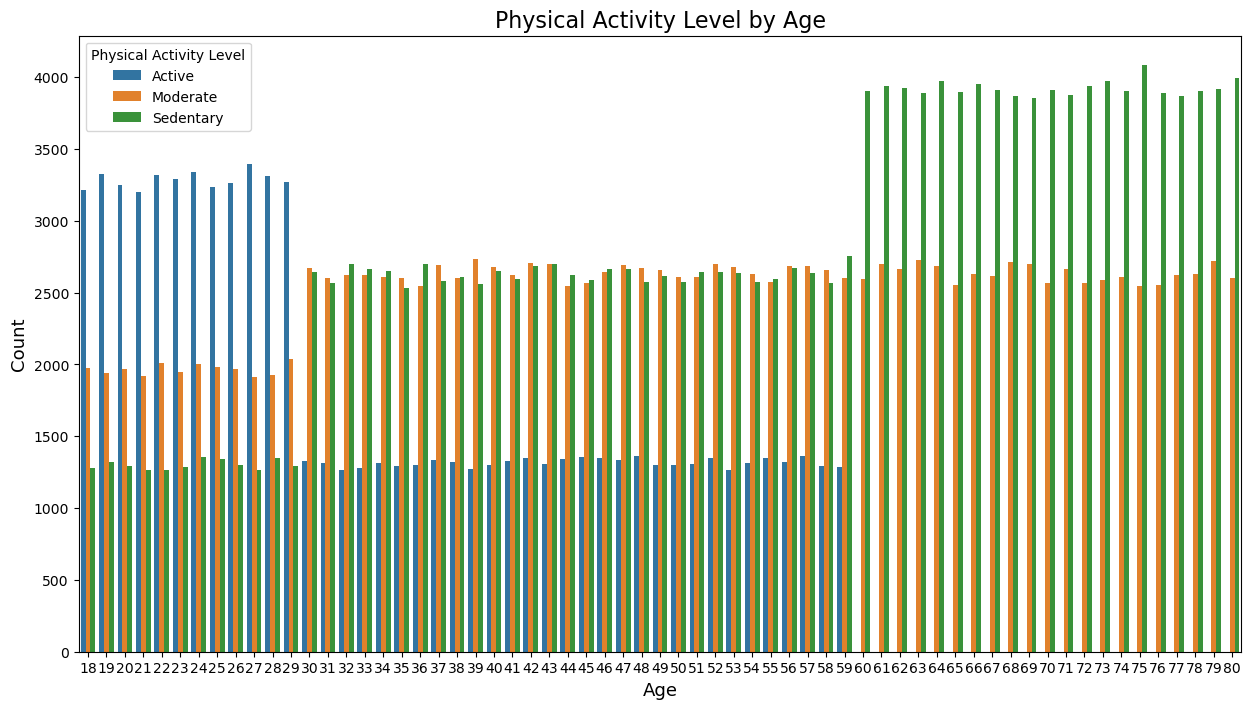

In [15]:
activity_age = df.groupby(["Physical Activity Level", "Age"])[["Age"]].count().rename(columns={'Age': 'count'}).reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(data = activity_age, x = "Age", y = "count", hue = "Physical Activity Level")
plt.title("Physical Activity Level by Age", fontsize= 16)
plt.xlabel("Age", fontsize= 13)
plt.ylabel("Count", fontsize= 13)
plt.show()

## Income and Age Groups

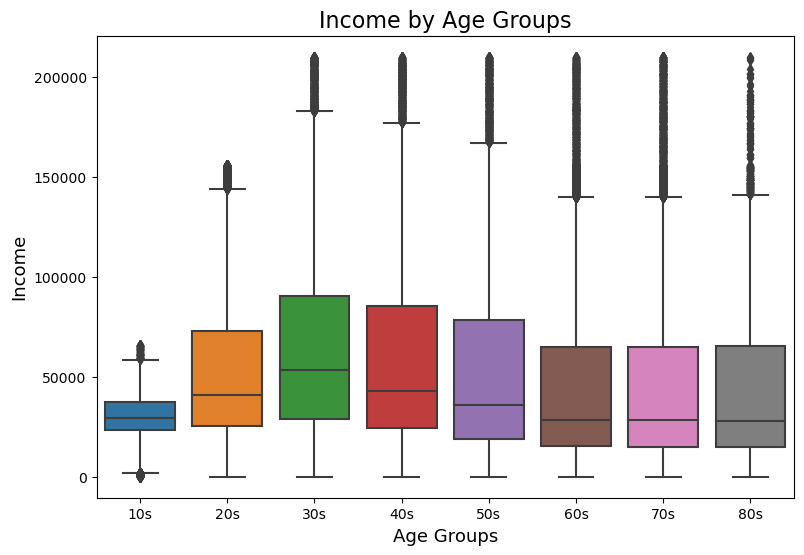

In [17]:
df["age_group"] = pd.cut(df["Age"], [9,19,29,39,49,59,69,79,89],
      labels = ["10s", "20s", "30s", "40s", "50s", "60s", "70s", "80s"])
plt.figure(figsize=(9,6))
sns.boxplot(data = df, x="age_group", y="Income")
plt.title("Income by Age Groups", fontsize= 16)
plt.xlabel("Age Groups", fontsize= 13)
plt.ylabel("Income", fontsize= 13)
plt.show()

## Income and Education Level

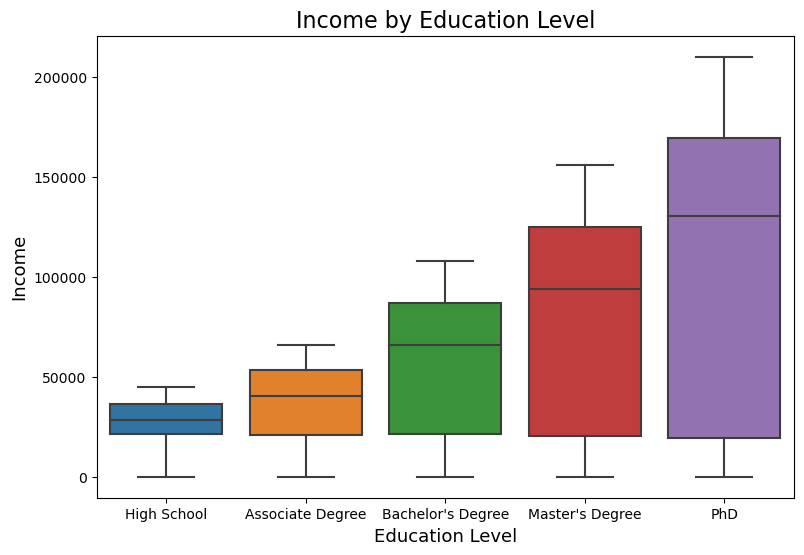

In [19]:
order = ["High School", "Associate Degree", "Bachelor's Degree", "Master's Degree", "PhD"]
plt.figure(figsize=(9,6))
sns.boxplot(data = df, x="Education Level", y="Income", order=order)
plt.title("Income by Education Level", fontsize= 16)
plt.xlabel("Education Level", fontsize= 13)
plt.ylabel("Income", fontsize= 13)
plt.show()

## Employment Status and Education Level

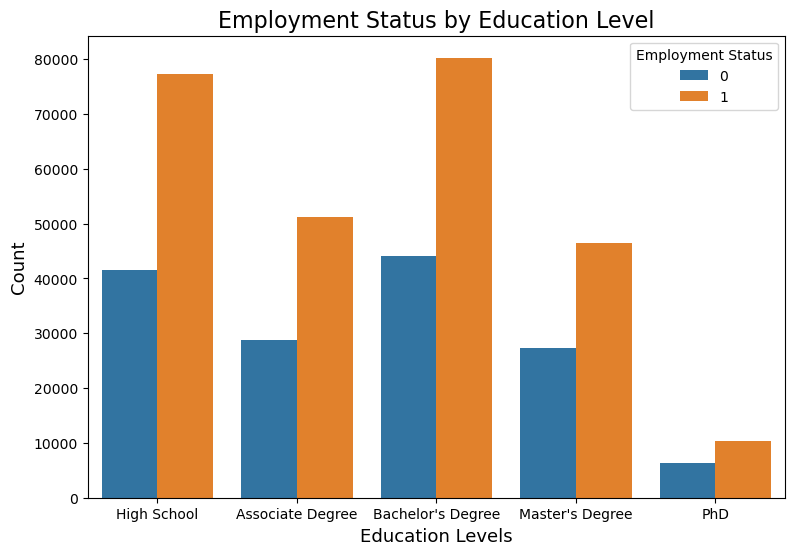

In [21]:
order = ["High School", "Associate Degree", "Bachelor's Degree", "Master's Degree", "PhD"]
education_emp = df.groupby(["Education Level", "Employment Status"])[["Employment Status"]].count().rename(columns={'Employment Status': 'count'}).reset_index()
plt.figure(figsize=(9,6))
sns.barplot(data = education_emp, x = "Education Level", y = "count", hue = "Employment Status", order= order)
plt.title("Employment Status by Education Level", fontsize= 16)
plt.xlabel("Education Levels", fontsize= 13)
plt.ylabel("Count", fontsize= 13)
plt.show()

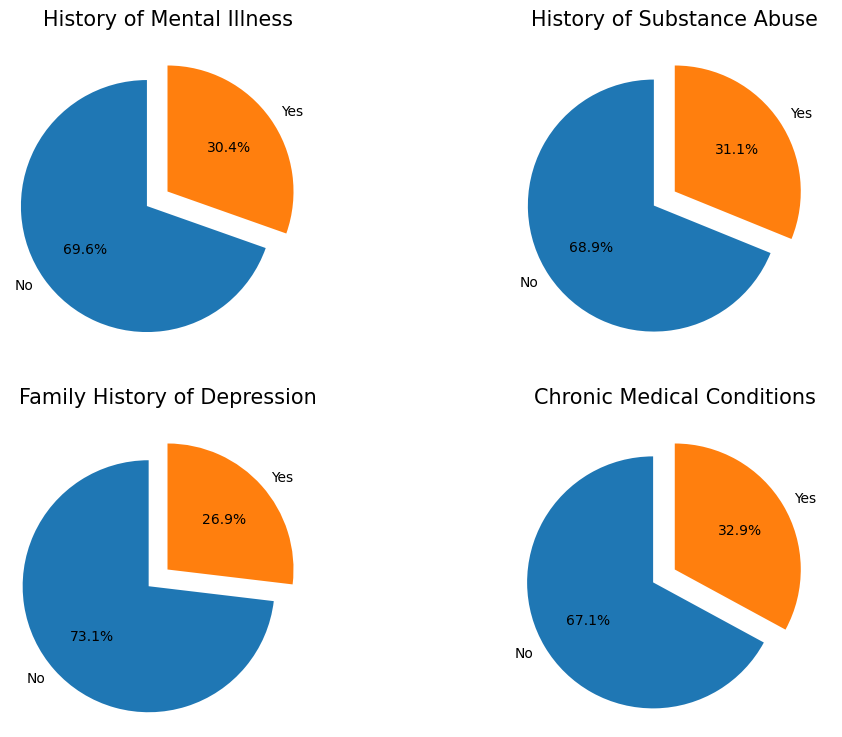

In [92]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
hist_illness = df.groupby(["History of Mental Illness"])["History of Mental Illness"].count()
hist_abuse = df.groupby(["History of Substance Abuse"])["History of Substance Abuse"].count()
fam_depression = df.groupby(["Family History of Depression"])["Family History of Depression"].count()
chronic_condition = df.groupby(["Chronic Medical Conditions"])["Chronic Medical Conditions"].count()
explode = [0.2, 0]
labels = ["No", "Yes"]
ax[0,0].pie(hist_illness, startangle=90, labels = labels, autopct='%1.1f%%', explode = explode)
ax[0,0].set_title("History of Mental Illness", fontsize= 15)

ax[0,1].pie(hist_abuse, startangle=90, labels = labels, autopct='%1.1f%%', explode = explode)
ax[0,1].set_title("History of Substance Abuse", fontsize= 15)

ax[1,0].pie(fam_depression, startangle=90, labels = labels, autopct='%1.1f%%', explode = explode)
ax[1,0].set_title("Family History of Depression", fontsize= 15)

ax[1,1].pie(chronic_condition, startangle=90, labels = labels, autopct='%1.1f%%', explode = explode)
ax[1,1].set_title("Chronic Medical Conditions", fontsize= 15)
plt.show()

## Sleep Patterns and Age Groups

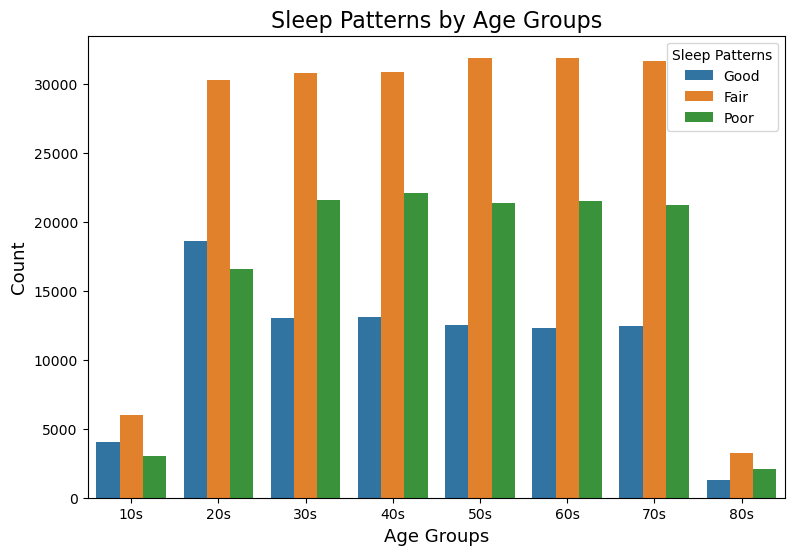

In [43]:
sleep_age = df.groupby(["age_group", "Sleep Patterns"])[["age_group"]].count().rename(columns={"age_group": "count"}).reset_index()
sleep_age['Sleep Patterns'] = pd.Categorical(sleep_age['Sleep Patterns'], categories=["Good", "Fair", "Poor"], ordered=True)
plt.figure(figsize=(9, 6))
sns.barplot(data = sleep_age, x= "age_group", y= "count", hue= "Sleep Patterns")
plt.title("Sleep Patterns by Age Groups", fontsize= 16)
plt.xlabel("Age Groups", fontsize= 13)
plt.ylabel("Count", fontsize= 13)
plt.show()

## Dietary Habits and Marital Status

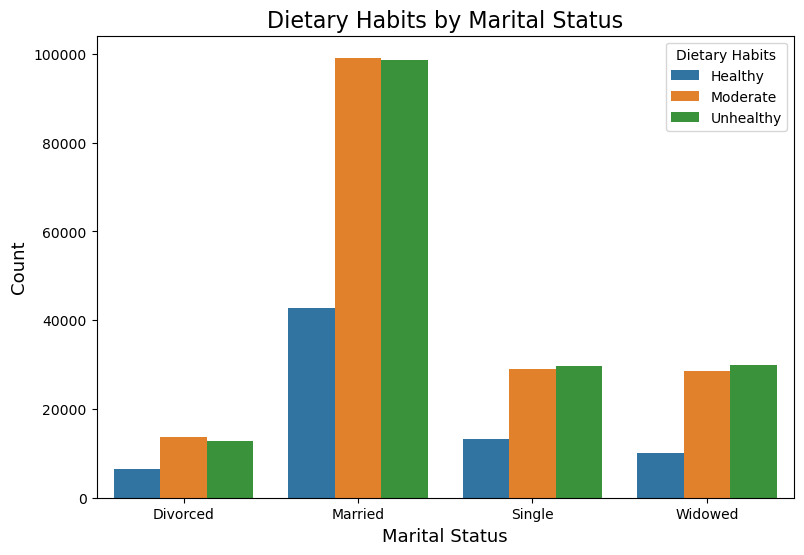

In [49]:
dietary_age = df.groupby(["Marital Status", "Dietary Habits"])[["Marital Status"]].count().rename(columns={"Marital Status": "count"}).reset_index()
plt.figure(figsize=(9, 6))
sns.barplot(data = dietary_age, x= "Marital Status", y= "count", hue= "Dietary Habits")
plt.title("Dietary Habits by Marital Status", fontsize= 16)
plt.xlabel("Marital Status", fontsize= 13)
plt.ylabel("Count", fontsize= 13)
plt.show()

## Alcohol Consumption and Smoking Status

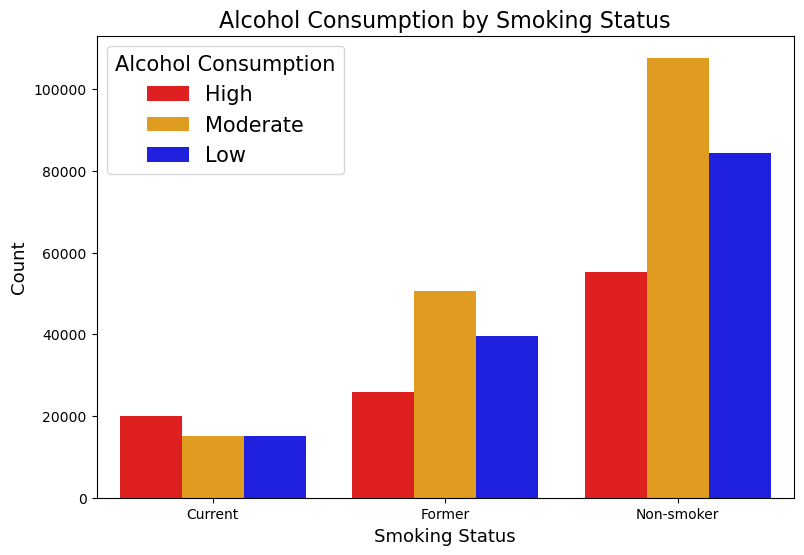

In [785]:
smoking_alc = df.groupby(["Smoking Status", "Alcohol Consumption"])[["Smoking Status"]].count().rename(columns={"Smoking Status": "count"}).reset_index()
smoking_alc["Alcohol Consumption"] = pd.Categorical(smoking_alc["Alcohol Consumption"], categories= ["High", "Moderate", "Low"], ordered=True)
color = ["red", "orange", "blue"]
plt.figure(figsize=(9, 6))
sns.barplot(data = smoking_alc, x= "Smoking Status", y = "count", hue = "Alcohol Consumption", palette = color)
plt.title("Alcohol Consumption by Smoking Status", fontsize= 16)
plt.xlabel("Smoking Status", fontsize= 13)
plt.ylabel("Count", fontsize= 13)
plt.legend(title =  "Alcohol Consumption", title_fontsize = 15, fontsize = 15)
plt.show()

## **Correlation Coefficient between Features**

In [688]:
# Create a new dataset for testings
df_corr_test = df.copy()

In [689]:
# Perform ordinal encoding to convert strings to numeric values
order_education = ["High School", "Associate Degree", "Bachelor's Degree", "Master's Degree", "PhD"]
order_smoking = ["Non-smoker", "Former", "Current"]
order_activity = ["Sedentary", "Moderate", "Active"]
order_alcohol = ["Low", "Moderate", "High"]
order_dietary = ["Unhealthy", "Moderate", "Healthy"]
order_sleep = ["Poor", "Fair", "Good"]
oe = OrdinalEncoder(categories= [order_education, order_smoking, order_activity, order_alcohol, order_dietary, order_sleep])

df_corr_test[["Education Level", "Smoking Status", "Physical Activity Level", "Alcohol Consumption", "Dietary Habits", "Sleep Patterns"]] = \
oe.fit_transform(df_corr_test[["Education Level", "Smoking Status", "Physical Activity Level", \
                               "Alcohol Consumption", "Dietary Habits", "Sleep Patterns"]]).astype(int)

In [691]:
# Perform label encoding to convert strings to numeric values
# [Divorced: 0, Married: 1, Single: 2, Widowed: 3]
le = LabelEncoder()
df_corr_test["Marital Status"] = le.fit_transform(df_corr_test["Marital Status"])

In [692]:
# Drop unnecessary columns
df_corr_test = df_corr_test.drop(columns = ["Name", "age_group"])

In [696]:
df_corr_test.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,1,2,2,0,2,0,26265.67,1,1,1,1,0,1,1
1,55,1,0,1,0,0,1,42710.36,2,0,1,1,0,0,1
2,78,3,3,1,0,0,1,125332.79,0,0,2,0,0,1,0
3,58,0,3,3,0,1,0,9992.78,1,1,0,0,0,0,0
4,18,2,0,0,0,0,0,8595.08,0,1,1,1,0,1,1


In [698]:
df_corr_test.describe()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
count,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000
mean,49.000713,1.426207,1.491031,1.298972,0.523288,0.763285,0.642048,50661.707971,0.907745,0.762398,0.898047,0.304096,0.311498,0.268878,0.329187
std,18.158759,0.856614,1.193380,1.237054,0.701393,0.749720,0.479398,40624.100565,0.756517,0.729116,0.716941,0.460024,0.463106,0.443377,0.469919
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21001.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,37520.135000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,65.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,76616.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,80.000000,3.000000,4.000000,4.000000,2.000000,2.000000,1.000000,209995.220000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


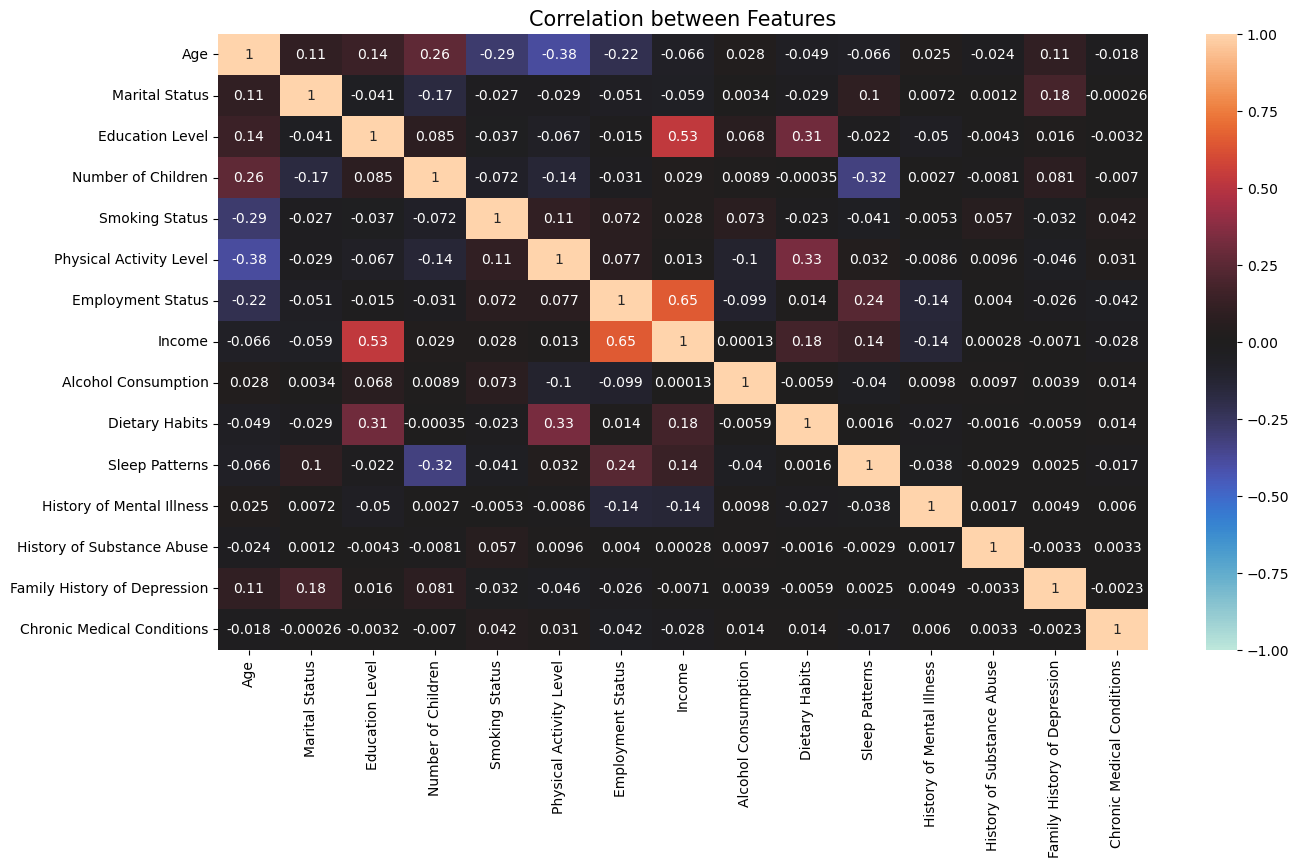

In [417]:
# Calculate the correlation between variables
corr = df_corr_test.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, vmax=1, vmin=-1, center=0, annot=True)
plt.title("Correlation between Features", fontsize=15)
plt.show()

### Positive Correlation
* Clearly, there is a strong positive correlation between Income and Employment Status. (0.65)
* As education level increases, income also tends to be higher. (0.53)
* Individuals with an active level of physical activity are more likely to have healthy dietary habits. (0.33)
* There is a possibility that healthy dietary habits are associated with a higher education level. (0.31)

### Negative Correlation
* As people get older, their level of physical activity tends to decrease. (-0.38)
* The more children people have, the worse their sleep patterns tend to be. (-0.32)
* The older individuals are, the more likely they are to be non-smokers. (-0.29)

## **Correlation Testing**

Since these two variables (**History of Mental Illness** and **Chronic Medical Conditions**) are clasified under depression, I will identify the correlations between them and the variables (**Income** and **Employment Status**) that are likely to have an impact, based on the heatmap. 

### Hypothesis (Pearson Correlation Test)
* Null Hypothesis (H0): There is no linear relationship between the two variables (r = 0).
* Alternative Hypothesis (H1): There is a linear relationship between the two variables (r ≠ 0).

In [313]:
# Pearson correlation for History of Mental Illness vs Income
corr_mental_test, p_mental_test = stats.pearsonr(df_corr_test["Income"], df_corr_test["History of Mental Illness"])

# Pearson correlation for Chronic Medical Conditions vs Income
corr_chronic_test, p_chronic_test = stats.pearsonr(df_corr_test["Income"], df_corr_test["Chronic Medical Conditions"])

# Print results
print(f"Correlation between History of Mental Illness and Income : {corr_mental_test}, P-Value: {p_mental_test}")
print(f"Correlation between Chronic Medical Conditions and Income : {corr_chronic_test}, P-Value: {p_chronic_test}")

Correlation between History of Mental Illness and Income : -0.13680475594352054, P-Value: 0.0
Correlation between Chronic Medical Conditions and Income : -0.02842678541019704, P-Value: 1.0104498423912106e-74


### Interpretation 

**History of Mental Illness** and **Income**
* Pearson Correlation **(-0.1368)**: This indicates a weak negative relationship.
* P-Value **(p = 0.0)**: Technically, p_value is not exactly 0, but it is rounded down, indicating it is close to 0. Since it is less than 0.05, I reject the null hypothesis, suggesting that the relationship is statistically significant.

**Chronic Medical Conditions** and **Income**
* Pearson Correlation **(-0.0284)**: This indicates a negative correlation, but it suggests that there is no meaningful relationship.
* P-Value **(p = 1.010e-74)**: Since p-value is less than 0.05, I reject the null hypothesis, suggesting that the relationship is statistically significant.

### Hypothesis (Spearman Correlation Test)
* Null Hypothesis (H0): There is no monotonic relationship between the two variables.
* Alternative Hypothesis (H1): There is a monotonic relationship between the two variables (r ≠ 0).

In [323]:
# Calculate Spearman's Rank Correlation for History of Mental Illness vs Employment Status
rho_employment_mental, p_value_employment_mental = spearmanr(df["Employment Status"], df["History of Mental Illness"])
print(f"Correlation between History of Mental Illnes and Employment Status : {rho_employment_mental}, P-Value: {p_value_employment_mental}")

# Calculate Spearman's Rank Correlation for Chronic Medical Conditions vs Employment Status
rho_employment_chronic, p_value_employment_chronic = spearmanr(df["Employment Status"], df["Chronic Medical Conditions"])
print(f"Correlation between Chronic Medical Conditions and Employment Status : {rho_employment_chronic}, P-Value: {p_value_employment_chronic}")

Correlation between History of Mental Illnes and Employment Status : -0.1407640147651324, P-Value: 0.0
Correlation between Chronic Medical Conditions and Employment Status : -0.04241331769206038, P-Value: 4.932236283333144e-164


### Interpretation 

**History of Mental Illness** and **Employment Status**
* Pearson Correlation **(-0.1407)**: This indicates a weak negative relationship.
* P-Value **(p = 0.0)**: It is also rounded down. Since it is less than 0.05, I reject the null hypothesis, suggesting that the relationship is statistically significant.

**Chronic Medical Conditions** and **Employment Status**
* Pearson Correlation **(-0.042)**: This indicates a negative correlation, but it suggests that there is no meaningful relationship
* P-Value **(p = 4.932e-164)**: Since p-value is less than 0.05, I reject the null hypothesis, suggesting that the relationship is statistically significant.

## **Hypothesis Testing** (Chi-Square Test)

### Hypothesis 1: Sleep Patterns and Employment Status
* Null Hypothesis (H0): Sleep Patterns and Employment Status are independent (there is no association between Sleep Patterns and Employment Status).
* Alternative Hypothesis (H1): Sleep Patterns and Employment Status are not independent (there is association between Sleep Patterns and Employment Status).

In [642]:
sleep_employment = df_corr_test.groupby(["Employment Status", "Sleep Patterns"])[["Sleep Patterns"]].count().unstack()
sleep_employment

Sleep Patterns               
Sleep Patterns                 0       1      2
Employment Status                              
0                          62881   70888  14340
1                          66701  125901  73057

In [652]:
# Creating the contingency table
data1 = np.array([[sleep_employment.iloc[0,:],
                 sleep_employment.iloc[1,:]]])

# Conduct the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(data1)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: {expected}")

Chi-Square Statistic: 23436.263018108828
P-Value: 0.0
Degrees of Freedom: 2
Expected Frequencies: [[[ 46384.11002784  70440.97658833  31283.91338383]
  [ 83197.88997216 126348.02341167  56113.08661617]]]


### Interpretation
* Since the p-value is less than 0.05 (very close to 0), there is a significant relationship between Sleep Patterns and Employment Status.

### Hypothesis 2: Dietary Habits and Education Level
* Null Hypothesis (H0): Dietary Habits and Education Level are independent (there is no association between Dietary Habits and Education Level).
* Alternative Hypothesis (H1): Dietary Habits and Education Level are not independent (there is association between Dietary Habits and Education Level).

In [628]:
education_dietary = df_corr_test.groupby(["Education Level", "Dietary Habits"])[["Dietary Habits"]].count().unstack()
education_dietary

Dietary Habits              
Dietary Habits               0      1      2
Education Level                             
0                        63806  51637   3484
1                        43041  35080   1878
2                        36526  48422  39381
3                        22323  28763  22682
4                         5121   6544   5080

In [646]:
# Creating the contingency table
data2 = np.array([[education_dietary.iloc[0,:],
                 education_dietary.iloc[1,:],
                 education_dietary.iloc[2,:],
                 education_dietary.iloc[3,:],
                 education_dietary.iloc[4,:]]])

# Conduct the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(data2)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: {expected}")

Chi-Square Statistic: 62993.775120824335
P-Value: 0.0
Degrees of Freedom: 8
Expected Frequencies: [[[49096.96583351 48990.33139827 20839.70276822]
  [33026.21078237 32954.48066066 14018.30855697]
  [51327.08859312 51215.61052087 21786.300886  ]
  [30453.84963554 30387.70646353 12926.44390093]
  [ 6912.88515545  6897.87095667  2934.24388788]]]


### Interpretation
* Since the p-value is less than 0.05 (very close to 0), there is a significant relationship between Dietary Habits and Education Level.

## **Interpretations**

* There is no variable that significantly and directly impacts depression.
* The work-related variables, such as Employment Status and Income, could be influencing mental illnesses. 
* Sleep Patterns and Dietary Habits are factors that we cannot ignore in preventing depression, as they may indirectly affect mental health based on the tests, although the correlation was weak.
* Other factors, such as the quality of individuals' relationships with friends, family, and coworkers, could have a more measurable impact on depression than the variables that this dataset has. 

## **Real-World Implications**

**Unhealthy behaviors and Depression** : It is unlikely that poor health behaviors cause depression, rather, depression leads to unhealthy lifestyle choices.

**Interpersonal relationships and stressfull experiences** : Interpersonal relationships or stressfull experiences (e.g. trauma, separation) in real life may be more closely related to depression rather than lifestyle factors.